In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
feature_data_file = "/home/jeffrey/repos/VSB_Power_Line_Fault_Detection/extracted_features/"+"train_features_thresh_5.0_db4.csv"
feature_data_file = "/home/jeffrey/repos/VSB_Power_Line_Fault_Detection/extracted_features/"+"train_features_noCancel_thresh_4.0_db4.csv"
df = pd.read_csv(feature_data_file)
df.head()

,Unnamed: 0,signal_id,entropy,n5,n25,n75,n95,median,mean,std,...,no_mean_crossings,min_height,max_height,mean_height,min_width,max_width,mean_width,num_detect_peak,num_true_peaks,fault
0,0,0,12.908398,-0.000145,-0.000021,0.000194,0.000303,0.000074,0.000082,0.239174,...,1132,-58.559519,42.203135,0.178062,1,7,2.622642,139,53,0
1,1,1,12.889437,-0.000137,-0.000024,0.000164,0.000313,0.000077,0.000079,0.058473,...,692,-15.858715,13.498418,-0.682464,2,8,3.200000,16,5,0
2,2,2,12.914089,-0.000213,-0.000038,0.000208,0.000394,0.000075,0.000084,0.159603,...,1338,-30.825770,34.019822,0.428568,1,5,2.863636,63,22,0
3,3,3,12.890308,-0.047006,-0.002800,0.002892,0.048004,0.000081,0.000093,0.666899,...,41638,-126.387116,122.169902,0.186803,1,8,3.319444,478,144,1
4,4,4,12.907007,-0.053503,-0.004727,0.004870,0.054509,0.000095,0.000087,0.143353,...,43200,-18.448819,27.875431,0.161259,1,6,2.625000,63,24,1


In [3]:
df.describe()

,Unnamed: 0,signal_id,entropy,n5,n25,n75,n95,median,mean,std,...,no_mean_crossings,min_height,max_height,mean_height,min_width,max_width,mean_width,num_detect_peak,num_true_peaks,fault
count,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8.712000e+03,8.712000e+03,8712.000000,8712.000000,8.712000e+03,...,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000
mean,4355.500000,4355.500000,12.900525,-0.096343,-0.015809,1.601850e-02,9.679970e-02,0.000109,0.000101,7.588318e-01,...,24751.157943,-74.927938,74.268414,-0.061323,0.843779,22.899449,2.893752,753.476814,144.766529,0.060262
std,2515.082106,2515.082106,0.025270,0.142419,0.025021,2.506501e-02,1.432543e-01,0.000556,0.000012,1.367346e+00,...,18856.957361,86.102294,86.452514,0.793909,0.659989,47.430297,2.432207,2267.447682,402.705198,0.237985
min,0.000000,0.000000,12.855448,-4.547130,-0.266396,6.219655e-08,1.241481e-07,-0.008358,-0.000001,7.265782e-08,...,20.000000,-255.180677,-9.771871,-9.771871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2177.750000,2177.750000,12.895440,-0.153275,-0.020724,3.336753e-04,4.618467e-03,0.000079,0.000093,9.959419e-02,...,6171.500000,-119.247139,0.000000,-0.076525,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,4355.500000,4355.500000,12.899390,-0.053116,-0.004395,4.598441e-03,5.379651e-02,0.000096,0.000102,2.435992e-01,...,27784.500000,-38.998663,37.544008,0.000000,1.000000,7.000000,2.841845,83.000000,27.000000,0.000000
75%,6533.250000,6533.250000,12.903347,-0.004365,-0.000137,2.093086e-02,1.541101e-01,0.000117,0.000109,6.113679e-01,...,38702.000000,-4.133572,116.393302,0.037363,1.000000,18.000000,3.833333,387.000000,111.000000,0.000000
max,8711.000000,8711.000000,13.592366,0.000018,0.000108,2.662385e-01,4.563621e+00,0.008268,0.000284,1.192015e+01,...,376312.000000,6.695139,255.464563,6.695139,15.000000,379.000000,18.000000,42623.000000,5458.000000,1.000000


In [4]:
df["fault"].value_counts()/len(df)  # imbalanced data set

0    0.939738
1    0.060262
Name: fault, dtype: float64

In [5]:
from sklearn.preprocessing import normalize
#feature_matrix_columns = ["entropy", "median", "mean", "std", "var", "rms", "no_zero_crossings", "no_mean_crossings", "fault"]
#feature_matrix_columns = ["median", "mean", "std", "var", "rms", "no_zero_crossings", "no_mean_crossings", "fault"]
#feature_matrix_columns = ["entropy", "fault"]
#features = df[["entropy", "n5", "n25", "n75", "n95", "median", "mean", "std", "var", "rms", "no_zero_crossings", "no_mean_crossings", "min_height", "max_height", "mean_height", "min_width", "max_width", "mean_width", "num_detect_peak", "num_true_peaks"]]
features = df[["entropy", "mean", "std", "var", "rms", "no_zero_crossings", "no_mean_crossings", "min_height", "max_height", "mean_height", "min_width", "max_width", "mean_width", "num_detect_peak", "num_true_peaks", "fault"]]
features = df[["entropy", "std", "max_width", "mean_width", "num_true_peaks", "fault"]]


#df2 = df[feature_matrix_columns]
#df_n = normalize(df2, axis=0)

features.head()

,entropy,std,max_width,mean_width,num_true_peaks,fault
0,12.908398,0.239174,7,2.622642,53,0
1,12.889437,0.058473,8,3.200000,5,0
2,12.914089,0.159603,5,2.863636,22,0
3,12.890308,0.666899,8,3.319444,144,1
4,12.907007,0.143353,6,2.625000,24,1


/home/jeffrey/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/jeffrey/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jeffrey/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/jeffrey/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

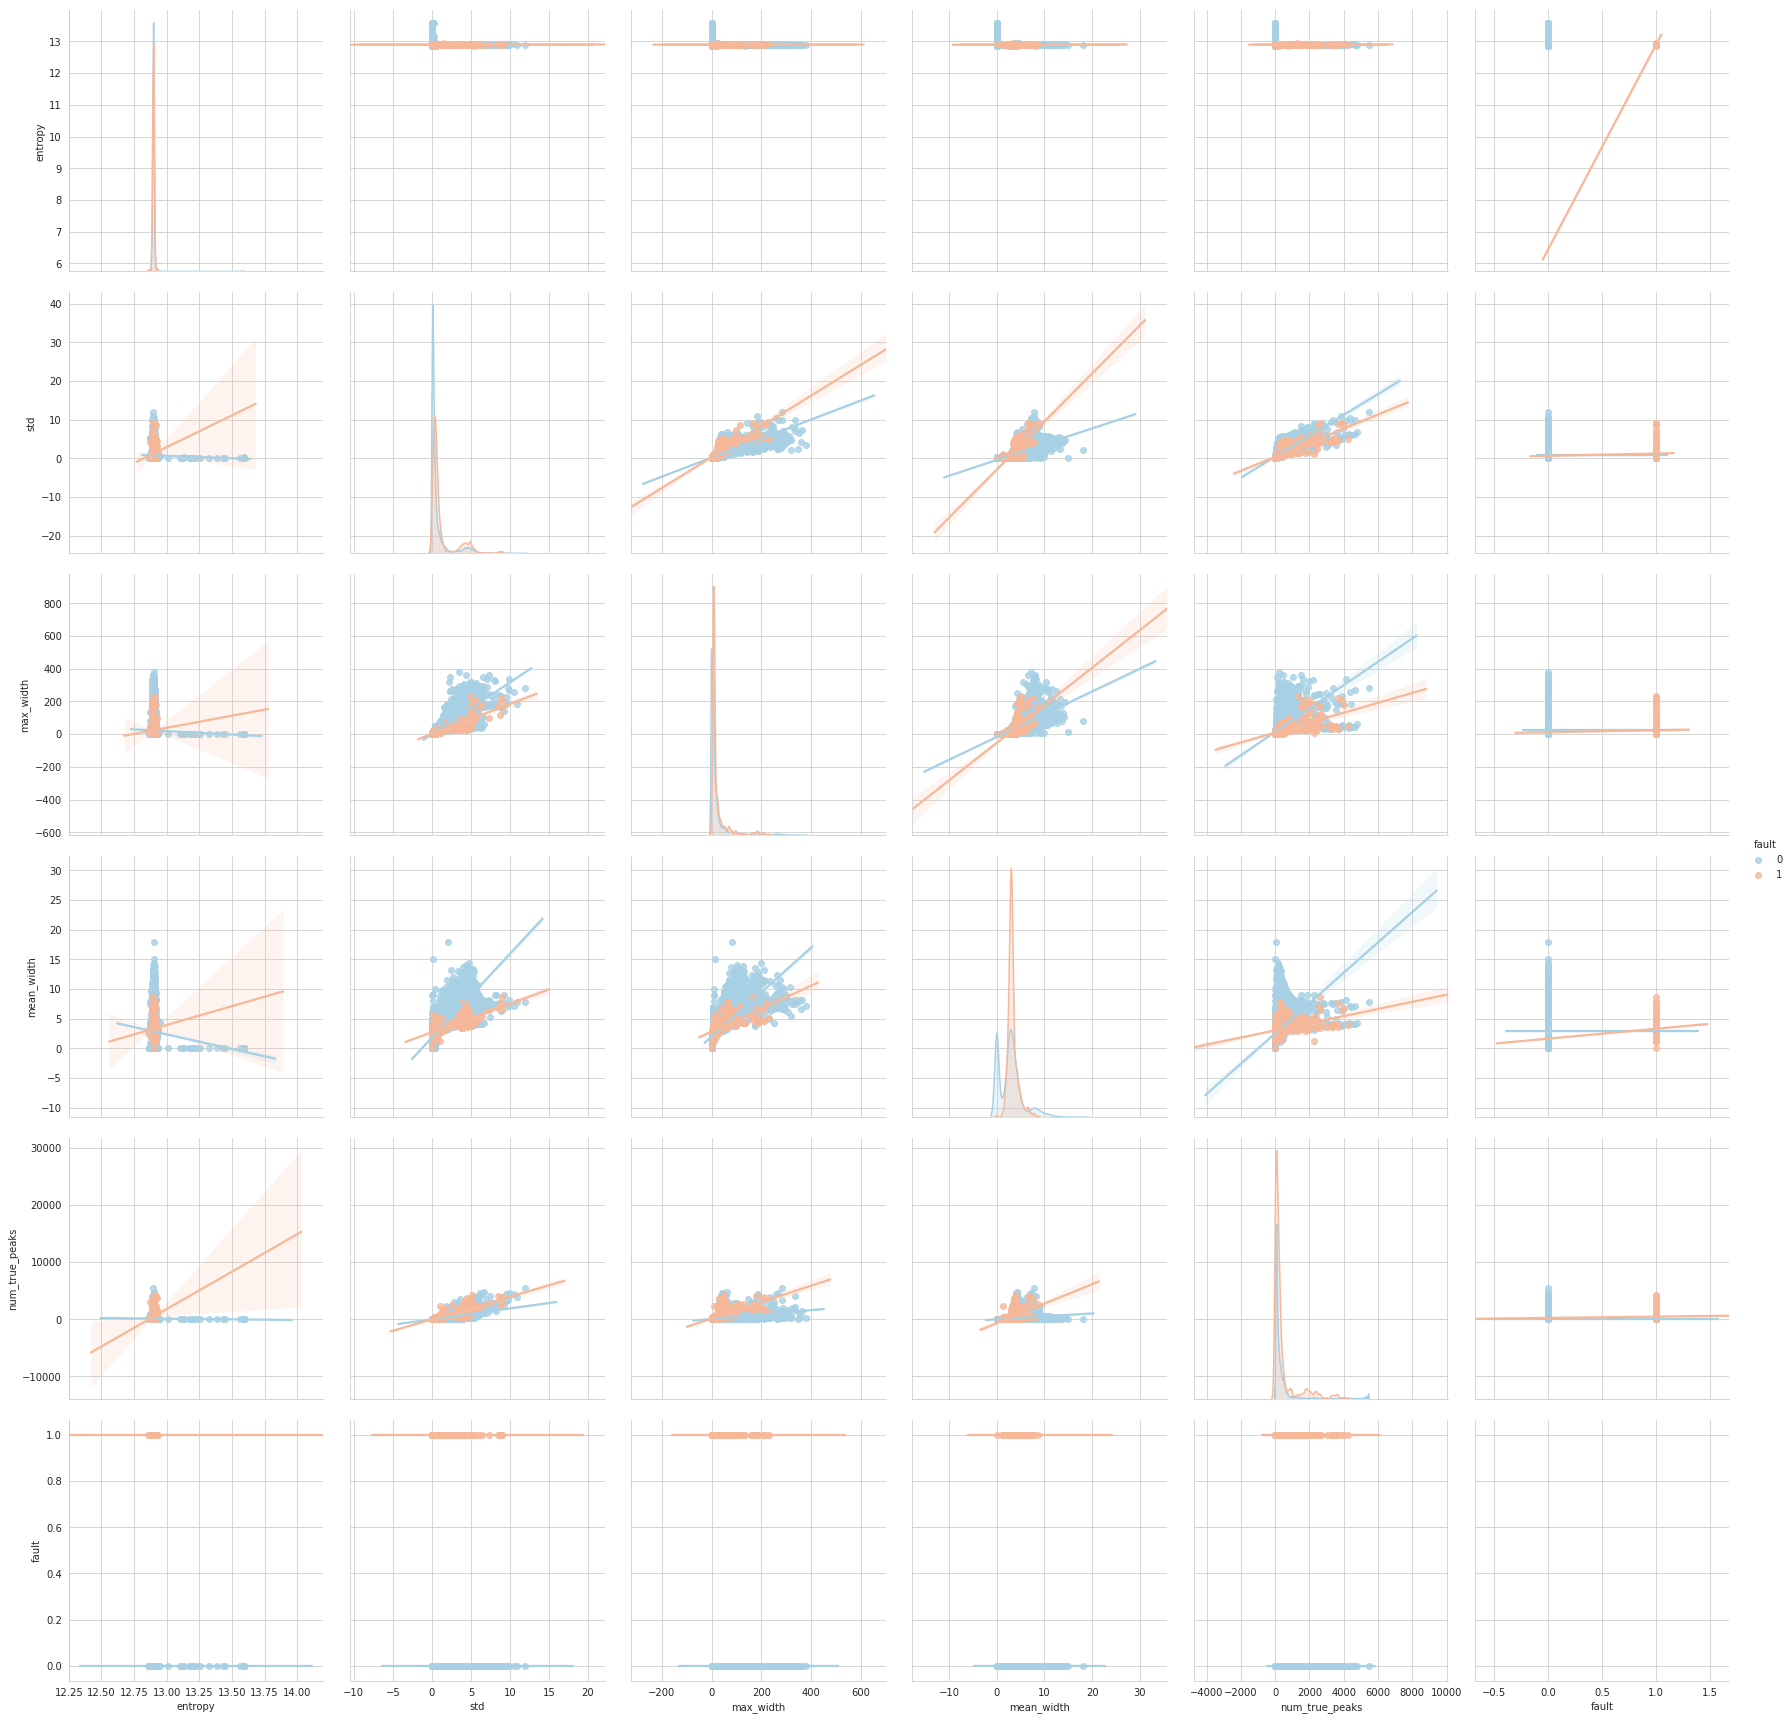

In [6]:
sns.set_style("whitegrid")
#g = sns.PairGrid(df2)  # Create a Pair Grid Instance
#g.map_upper(sns.regplot, color="#51ACC5")
#g.map_diag(sns.kdeplot, legend=False, shade=True)
#g.map_lower(sns.kdeplot, shade=False, cmap="Blues")

sns.pairplot(features, diag_kind="kde", kind="reg", hue="fault", palette="RdBu_r", height=4)

In [3]:
feature_data_file = "/home/jeffrey/repos/VSB_Power_Line_Fault_Detection/"+"train_features_coif2.csv"
df = pd.read_csv(feature_data_file)
df.describe()

,Unnamed: 0,signal_id,measurement_id,entropy,n5,n25,n75,n95,median,mean,std,var,rms,no_zero_crossings,no_mean_crossings,fault
count,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8712.000000
mean,4355.500000,4355.500000,1451.500000,13.592365,35185.617080,35185.576446,-8.402558e-02,-1.693929e-02,1.697062e-02,8.387472e-02,1.590770e-05,-3.372112e-08,9.410201e-01,3.398577e+00,8.500303e-02,0.060262
std,2515.082106,2515.082106,838.360658,0.000002,30903.591681,30903.584613,1.272217e-01,2.960839e-02,2.967256e-02,1.267561e-01,7.643300e-04,1.571926e-06,1.585354e+00,9.364293e+00,1.499875e-01,0.237985
min,0.000000,0.000000,0.000000,13.592354,16.000000,16.000000,-2.520774e+00,-2.620260e-01,4.427411e-08,1.260287e-07,-9.993422e-03,-7.550680e-05,8.489460e-08,7.207094e-15,5.941787e-08,0.000000
25%,2177.750000,2177.750000,725.750000,13.592366,9862.000000,9862.000000,-1.419694e-01,-1.858034e-02,1.688508e-04,2.583466e-03,-9.436344e-06,-3.112240e-09,1.164856e-01,1.356890e-02,7.749698e-03,0.000000
50%,4355.500000,4355.500000,1451.500000,13.592366,34685.500000,34685.500000,-2.531232e-02,-3.067217e-03,3.057062e-03,2.557124e-02,4.894817e-07,3.269437e-12,2.862180e-01,8.192131e-02,3.359267e-02,0.000000
75%,6533.250000,6533.250000,2177.250000,13.592366,49632.500000,49632.500000,-2.564215e-03,-1.679809e-04,1.858604e-02,1.422682e-01,1.216529e-05,3.574272e-09,7.494380e-01,5.616577e-01,9.308858e-02,0.000000
max,8711.000000,8711.000000,2903.000000,13.592366,295578.000000,295580.000000,-1.326336e-07,-3.191215e-08,2.615520e-01,2.530573e+00,9.467513e-03,1.333341e-05,1.041069e+01,1.083824e+02,1.900226e+00,1.000000


/home/jeffrey/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/jeffrey/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jeffrey/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/jeffrey/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

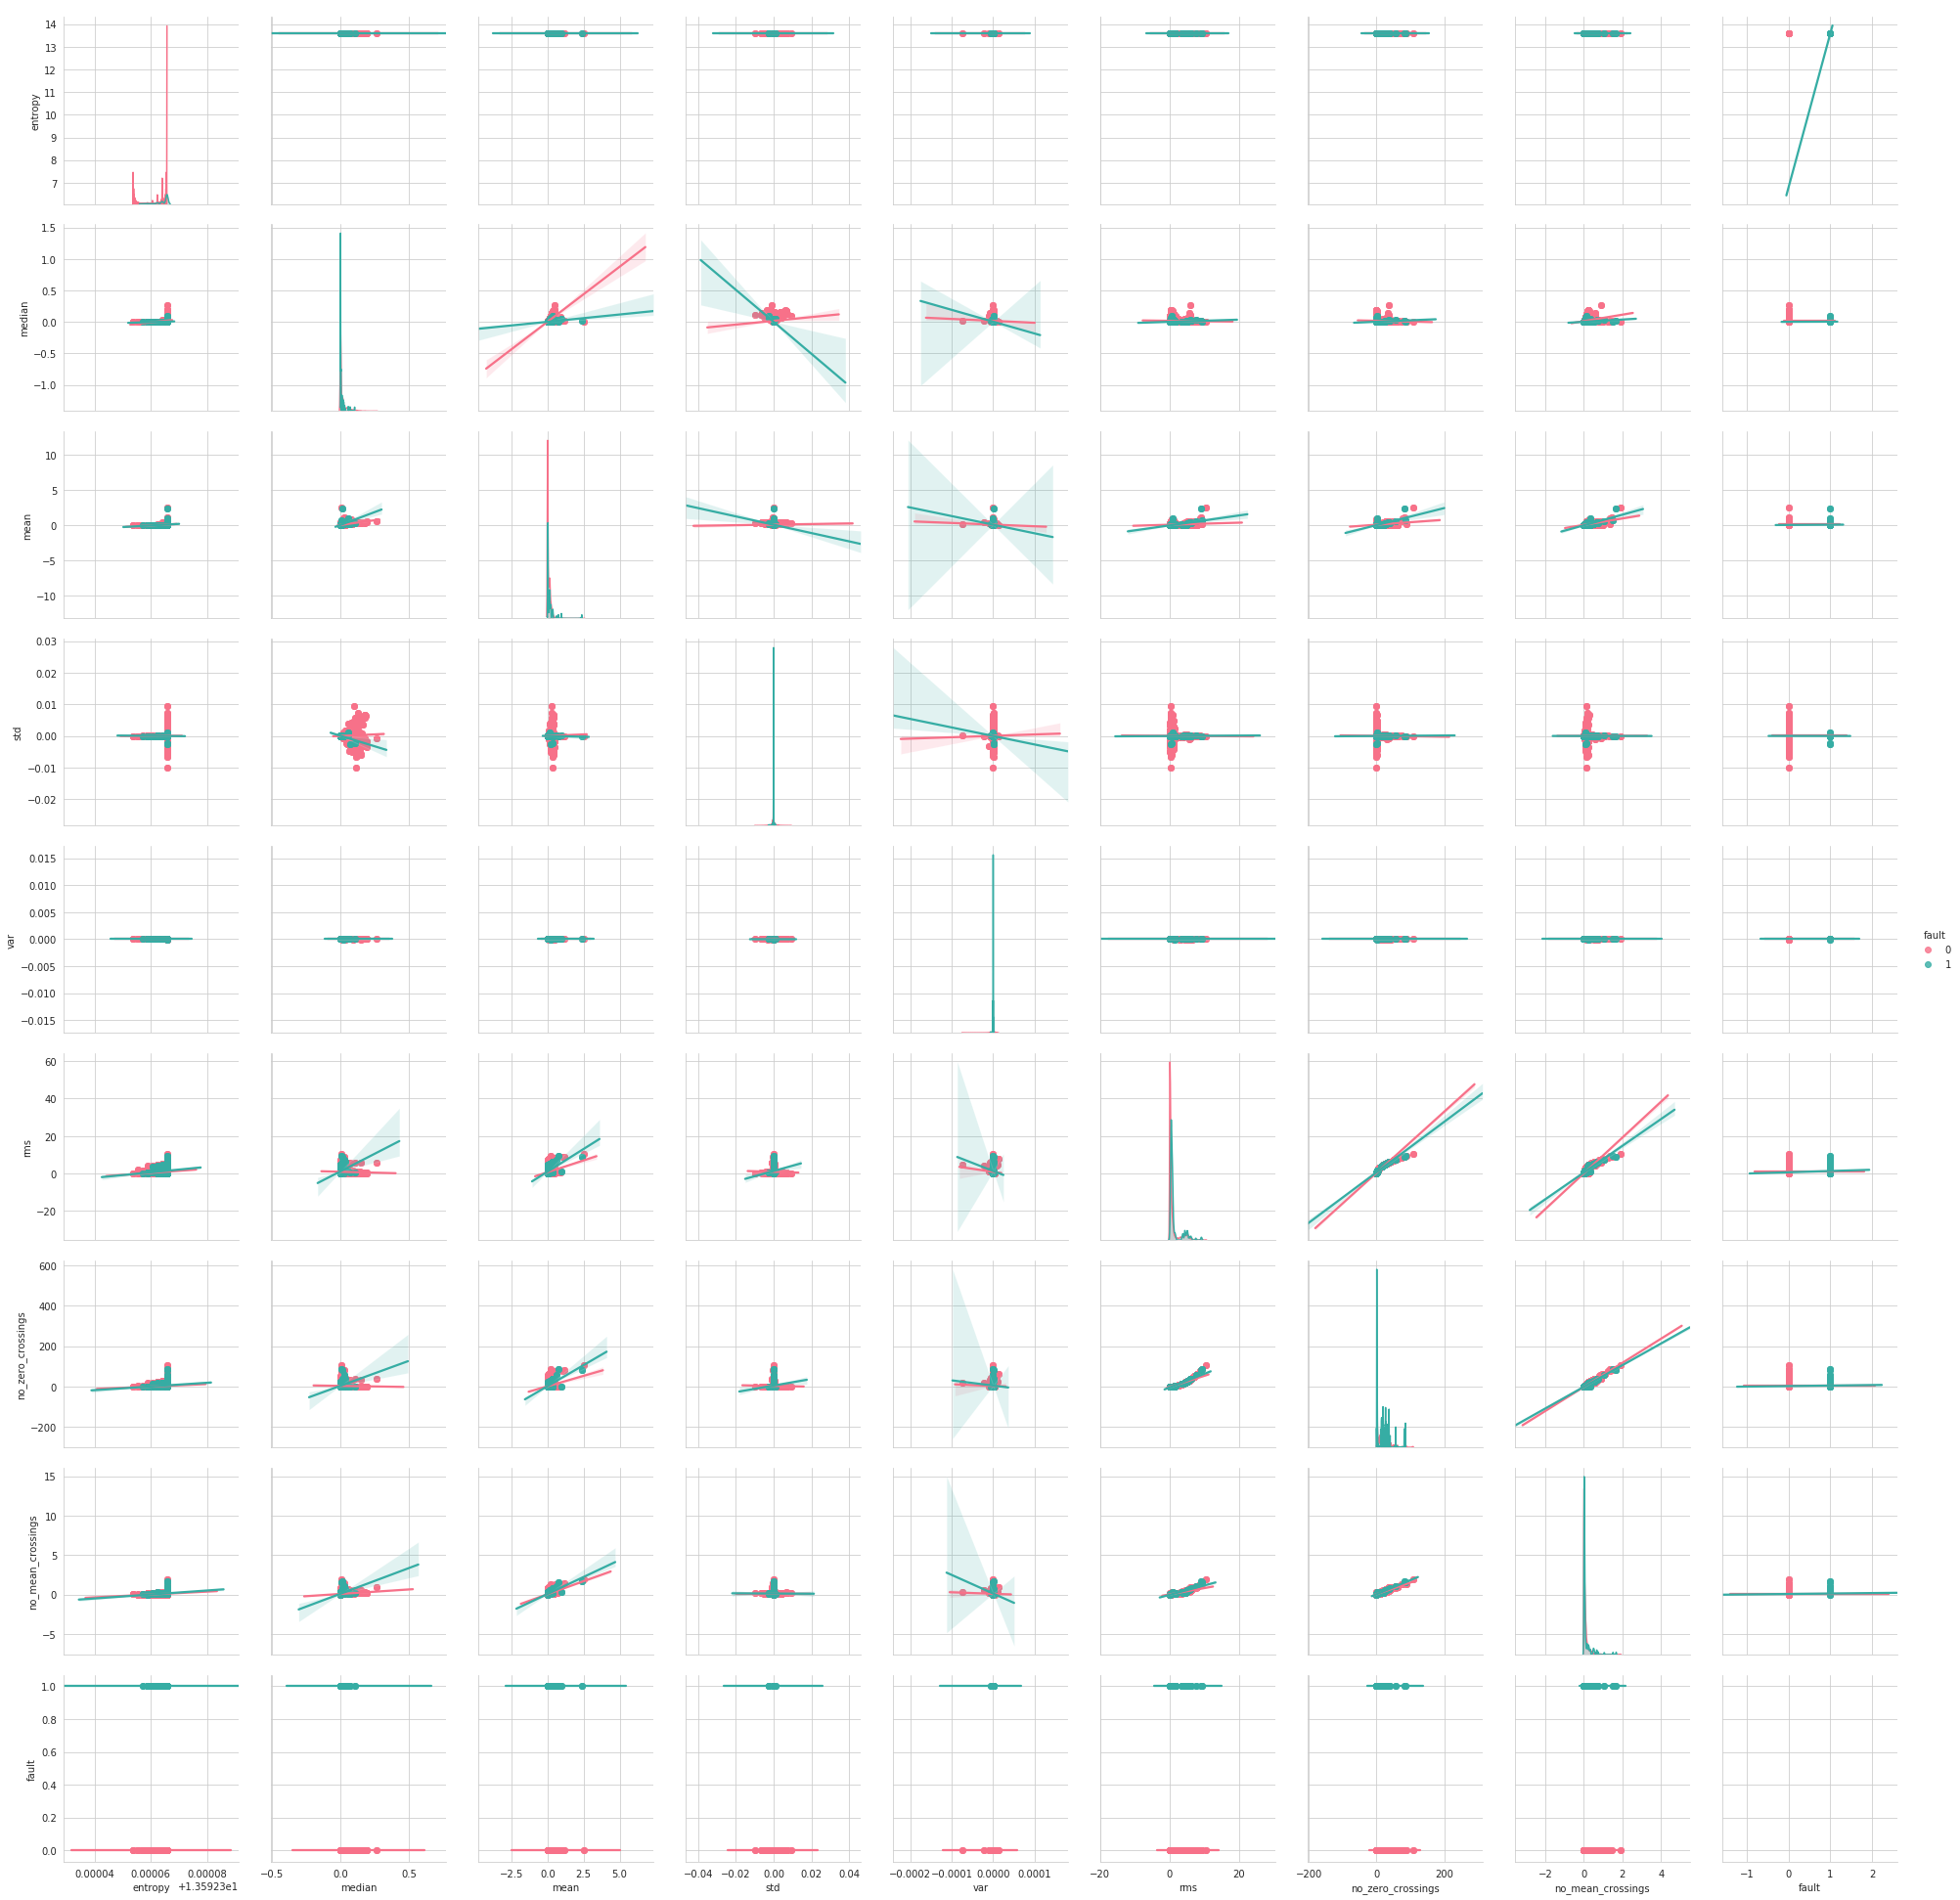

In [5]:
feature_matrix_columns = ["entropy", "median", "mean", "std", "var", "rms", "no_zero_crossings", "no_mean_crossings", "fault"]
#feature_matrix_columns = ["median", "mean", "std", "var", "rms", "no_zero_crossings", "no_mean_crossings", "fault"]
#feature_matrix_columns = ["entropy", "fault"]

df2 = df[feature_matrix_columns]

sns.set_style("whitegrid")
#g = sns.PairGrid(df2)  # Create a Pair Grid Instance
#g.map_upper(sns.regplot, color="#51ACC5")
#g.map_diag(sns.kdeplot, legend=False, shade=True)
#g.map_lower(sns.kdeplot, shade=False, cmap="Blues")

sns.pairplot(df2, diag_kind="kde", kind="reg", hue="fault", palette="husl", height=3)